http://www.easy-tensorflow.com/tf-tutorials/recurrent-neural-networks/vanilla-rnn-for-classification

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.contrib import rnn

Our dataset is the MNIST dataset of handwritten digits 

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train, y_train, x_valid, y_valid = mnist.train.images, mnist.train.labels, mnist.validation.images, mnist.validation.labels

In [4]:
def randomize(x, y):
    """ Randomizes the order of data samples and their corresponding labels"""
    permutation = np.random.permutation(y.shape[0])
    shuffled_x = x[permutation, :]
    shuffled_y = y[permutation]
    return shuffled_x, shuffled_y

def get_next_batch(x, y, start, end):
    x_batch = x[start:end]
    y_batch = y[start:end]
    return x_batch, y_batch

In [5]:
#parameters
inputs = 28 # input image is 28 x 28  (cols)
steps = 28 #  (rows)
classes = 10 # we want to have 10 classes 

In [6]:
#hyperparameters
learning_rate = 0.001 
epochs = 10
batch_size = 100 
freq = 100

In [7]:
hidden_units = 128

In [8]:
def weight_variable(shape): 
    initer = tf.truncated_normal_initializer(stddev=0.01)
    return tf.get_variable('W',dtype=tf.float32,shape=shape,initializer=initer)

In [9]:
def bias_variable(shape):
    initial = tf.constant(0., shape=shape, dtype=tf.float32)
    return tf.get_variable('b',dtype=tf.float32,initializer=initial)

In [10]:
def RNN(x,weights,biases, timesteps, hidden):
    x = tf.unstack(x,timesteps,1)
    rnn_cell = rnn.BasicRNNCell(hidden)
    states_series, current_state = rnn.static_rnn(rnn_cell, x, dtype=tf.float32)
    return tf.matmul(current_state, weights)+biases

In [11]:
x = tf.placeholder(tf.float32, shape=[None, steps, inputs], name='X')
y = tf.placeholder(tf.float32, shape=[None, classes], name='Y')

In [12]:
# Define the network 

In [13]:
W = weight_variable(shape=[hidden_units, classes])
b = bias_variable(shape=[classes])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
output_logits = RNN(x,W,b, steps, hidden_units)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API


In [15]:
y_pred = tf.nn.softmax(output_logits)

In [16]:
# Model predictions
cls_prediction = tf.argmax(output_logits, axis=1, name='predictions')

# Define the loss function, optimizer, and accuracy
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=output_logits), name='loss')
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, name='Adam-op').minimize(loss)
correct_prediction = tf.equal(tf.argmax(output_logits, 1), tf.argmax(y, 1), name='correct_pred')
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [17]:
init = tf.global_variables_initializer()
 

In [18]:
sess = tf.InteractiveSession()
sess.run(init)
global_step = 0
# Number of training iterations in each epoch
num_tr_iter = int(len(y_train) / batch_size)
for epoch in range(epochs):
    print('Training epoch: {}'.format(epoch + 1))
    x_train, y_train = randomize(x_train, y_train)
    for iteration in range(num_tr_iter):
        global_step += 1
        start = iteration * batch_size
        end = (iteration + 1) * batch_size
        x_batch, y_batch = get_next_batch(x_train, y_train, start, end)
        x_batch = x_batch.reshape((batch_size, steps, inputs))
        # Run optimization op (backprop)
        feed_dict_batch = {x: x_batch, y: y_batch}
        sess.run(optimizer, feed_dict=feed_dict_batch)

        if iteration % freq == 0:
            # Calculate and display the batch loss and accuracy
            loss_batch, acc_batch = sess.run([loss, accuracy],
                                             feed_dict=feed_dict_batch)

            print("iter {0:3d}:\t Loss={1:.2f},\tTraining Accuracy={2:.01%}".
                  format(iteration, loss_batch, acc_batch))

    # Run validation after every epoch

    feed_dict_valid = {x: x_valid[:1000].reshape((-1, steps, inputs)), y: y_valid[:1000]}
    loss_valid, acc_valid = sess.run([loss, accuracy], feed_dict=feed_dict_valid)
    print('---------------------------------------------------------')
    print("Epoch: {0}, validation loss: {1:.2f}, validation accuracy: {2:.01%}".
          format(epoch + 1, loss_valid, acc_valid))
    print('---------------------------------------------------------')

Training epoch: 1
iter   0:	 Loss=2.29,	Training Accuracy=33.0%
iter 100:	 Loss=0.92,	Training Accuracy=72.0%
iter 200:	 Loss=0.57,	Training Accuracy=88.0%
iter 300:	 Loss=0.42,	Training Accuracy=90.0%
iter 400:	 Loss=0.32,	Training Accuracy=91.0%
iter 500:	 Loss=0.46,	Training Accuracy=90.0%
---------------------------------------------------------
Epoch: 1, validation loss: 0.31, validation accuracy: 91.7%
---------------------------------------------------------
Training epoch: 2
iter   0:	 Loss=0.21,	Training Accuracy=94.0%
iter 100:	 Loss=0.31,	Training Accuracy=94.0%
iter 200:	 Loss=0.23,	Training Accuracy=90.0%
iter 300:	 Loss=0.22,	Training Accuracy=94.0%
iter 400:	 Loss=0.35,	Training Accuracy=93.0%
iter 500:	 Loss=0.16,	Training Accuracy=94.0%
---------------------------------------------------------
Epoch: 2, validation loss: 0.23, validation accuracy: 93.6%
---------------------------------------------------------
Training epoch: 3
iter   0:	 Loss=0.31,	Training Accuracy=92

In [19]:
def plot_images(images, cls_true, cls_pred=None, title=None):
    """
    Create figure with 3x3 sub-plots.
    :param images: array of images to be plotted, (9, img_h*img_w)
    :param cls_true: corresponding true labels (9,)
    :param cls_pred: corresponding true labels (9,)
    """
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(np.squeeze(images[i]).reshape(28, 28), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            ax_title = "True: {0}".format(cls_true[i])
        else:
            ax_title = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_title(ax_title)

        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])

    if title:
        plt.suptitle(title, size=20)
    plt.show(block=False)

def plot_example_errors(images, cls_true, cls_pred, title=None):
    """
    Function for plotting examples of images that have been mis-classified
    :param images: array of all images, (#imgs, img_h*img_w)
    :param cls_true: corresponding true labels, (#imgs,)
    :param cls_pred: corresponding predicted labels, (#imgs,)
    """
    # Negate the boolean array.
    incorrect = np.logical_not(np.equal(cls_pred, cls_true))

    # Get the images from the test-set that have been
    # incorrectly classified.
    incorrect_images = images[incorrect]

    # Get the true and predicted classes for those images.
    cls_pred = cls_pred[incorrect]
    cls_true = cls_true[incorrect]

    # Plot the first 9 images.
    plot_images(images=incorrect_images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9],
                title=title)
 

---------------------------------------------------------
Test loss: 0.14, test accuracy: 96.3%
---------------------------------------------------------


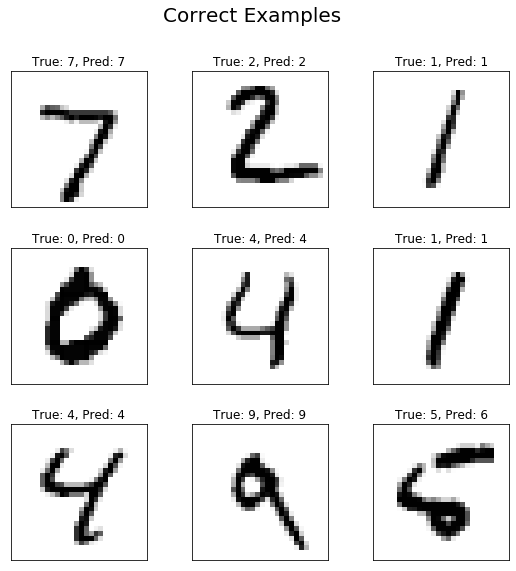

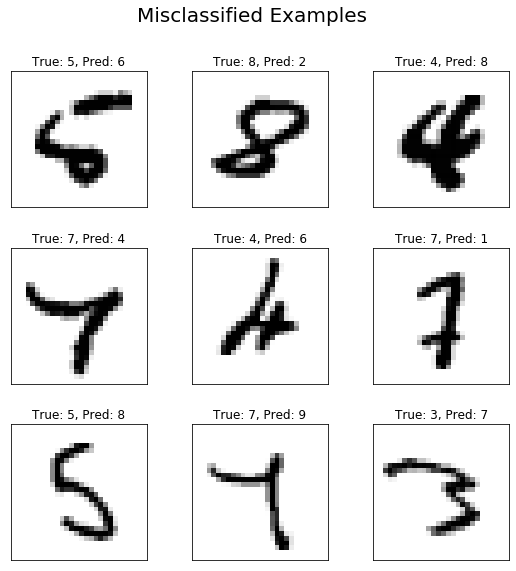

In [21]:
# Test the network (only on 1000 samples) after training
# Accuracy
x_test, y_test = mnist.test.images, mnist.test.labels
feed_dict_test = {x: x_test[:1000].reshape((-1, steps, inputs)), y: y_test[:1000]}
loss_test, acc_test = sess.run([loss, accuracy], feed_dict=feed_dict_test)
print('---------------------------------------------------------')
print("Test loss: {0:.2f}, test accuracy: {1:.01%}".format(loss_test, acc_test))
print('---------------------------------------------------------')

# Plot some of the correct and misclassified examples
cls_pred = sess.run(cls_prediction, feed_dict=feed_dict_test)
cls_true = np.argmax(y_test, axis=1)
plot_images(x_test, cls_true, cls_pred, title='Correct Examples')
plot_example_errors(x_test[:1000], cls_true[:1000], cls_pred, title='Misclassified Examples')
plt.show()
 